# Lab 2 - Time Domain Filtering
This lab is meant to give you an introduction to working with discrete time
signals and systems and implement some temporal filters in discrete time from
scratch using Python.

**Team Members**: Grant Miller, Steven Gong

In [47]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt
import scipy.signal
from scipy import *
import copy
import pylab as pl
from scipy import signal
import time as t
from IPython import display

# 1 Implementing Discrete Time Filters to Filter Time-Series Data

In this part, we will be looking at various discrete time filters and how they are used to make more sense of time-series data. These are very common, basic and helpful operations that one encounters in anything related to signal processing.

## 1.1 Implementing a Mean Filter

### n is an array containing integers from -5 to 6 (exclusive) with a step size of 1.

In [48]:
n = np.arange(-5, 6, 1)
print(n)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]


In [49]:
# choose relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,3,1/srate) # associated time vector that corresponds to 3 seconds
n     = len(time) # length of the time vector
p     = 15 # poles for random interpolation
pi = np.pi # value of pi
sigamp1 = 30 # amplitude of base signal 1
sigamp2 = 5 # amplitude of base signal 2

# here are some base signals to work with
base1 = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*sigamp1)
# np.interp(x, xp, fp)
# Returns the one-dimensional piecewise linear interpolant to a function with given discrete data points (xp, fp), evaluated at x.

base2 = 5*np.sin(2*pi*sigamp2*time)

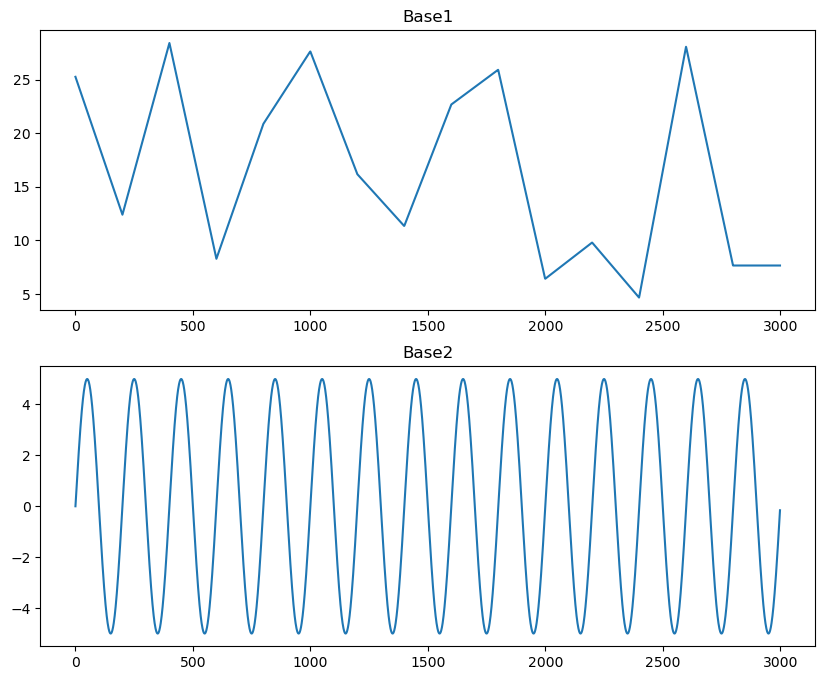

In [50]:
#TO DO: plot base signals
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.title('Base1')
plt.plot(base1)
plt.subplot(212)
plt.title('Base2')
plt.plot(base2)

In [51]:
# create some random noise to be added to the abve base signals

# Part a
k = 10

# Part b
noise = np.random.randn(n)

# add noise to the base signals to create new noisy signals - Part c
signal1 = base1 + noise
signal2 = base2 + noise

In [52]:
# implement the running mean filter

filtsig1 = np.zeros(n) # initialize filtered signal vector for signal 1
filtsig2 = np.zeros(n) # initialize filtered signal vector for signal 2

# Part d
for i in range(k, n-k):
    filtsig1[i] = np.mean(signal1[i-k:i+k+1])
    filtsig2[i] = np.mean(signal2[i-k:i+k+1])
    
# compute the time window size in ms and print it
windowsize = (2 * k + 1) / srate * 1000

# slides across the signal in ms
print("The time window size used was ",windowsize,"ms")

The time window size used was  21.0 ms


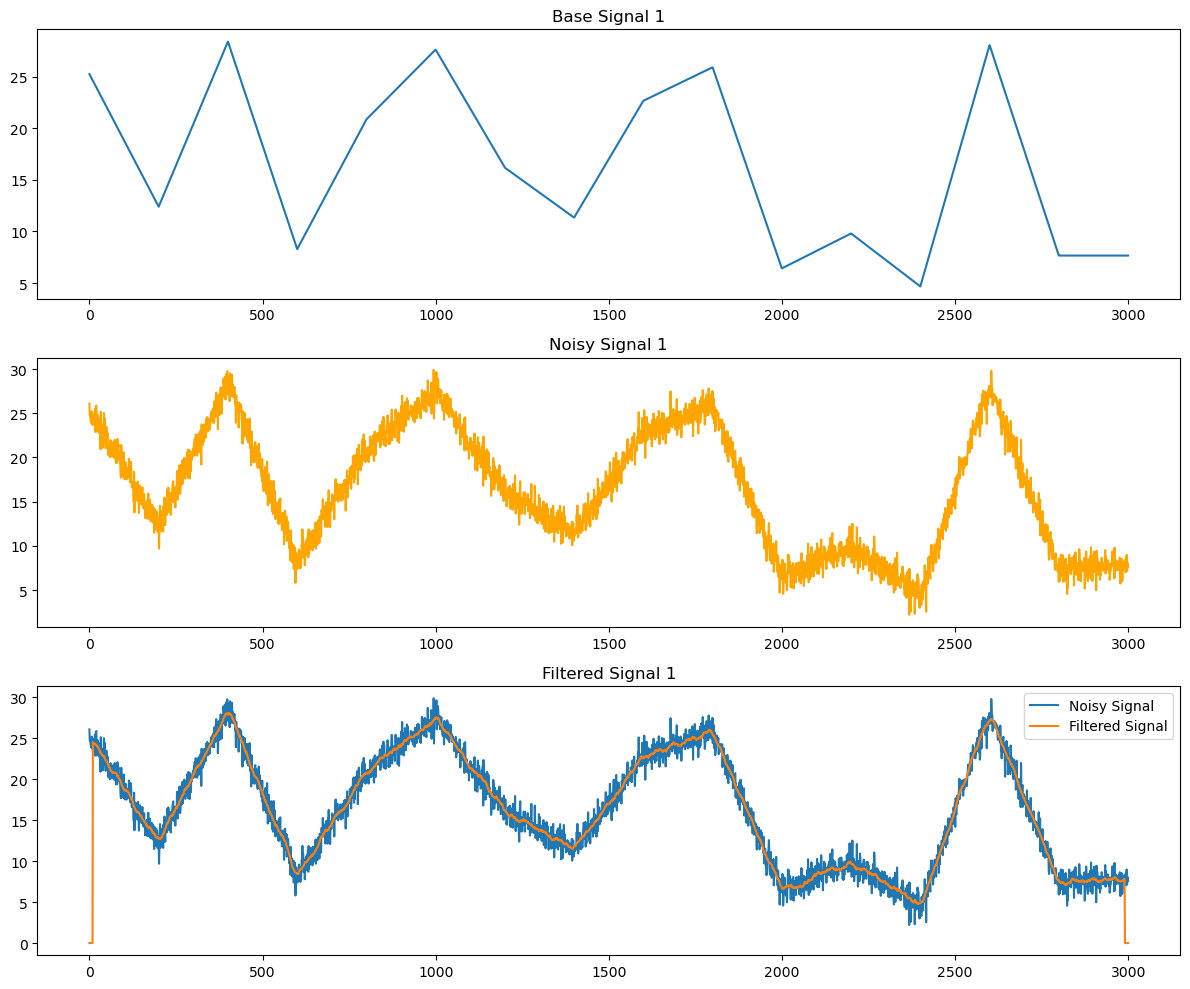

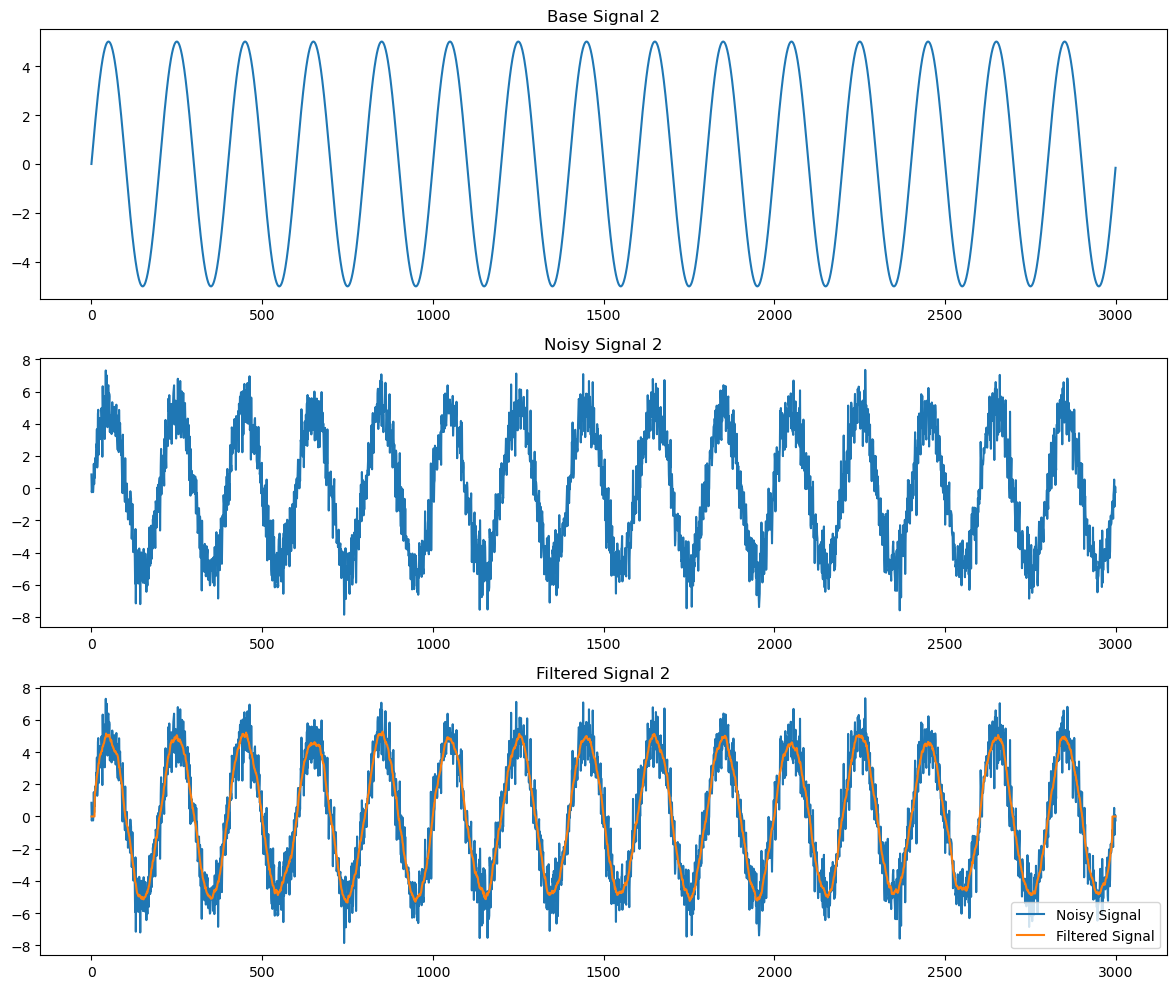

In [53]:
# For base signal 1:
# In a single plot and three subplots, plot the original signal, noisy signal and
# filtered signal overliad on the noisy signal to see the difference
# Plot base signals, noisy signals, and filtered signals
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.title("Base Signal 1")
plt.plot(base1, label="Base Signal")

plt.subplot(3, 1, 2)
plt.title("Noisy Signal 1")
plt.plot(signal1, label="Noisy Signal", color="orange")

plt.subplot(3, 1, 3)
plt.title("Filtered Signal 1")
plt.plot(signal1, label="Noisy Signal")
plt.plot(filtsig1, label="Filtered Signal")
plt.legend()

plt.tight_layout()
plt.show()


# For base signal 2:
# In a single plot and three subplots, plot the original signal, noisy signal and
# filtered signal overliad on the noisy signal to see the difference
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.title("Base Signal 2")
plt.plot(base2, label="Base Signal")

plt.subplot(3, 1, 2)
plt.title("Noisy Signal 2")
plt.plot(signal2, label="Noisy Signal")

plt.subplot(3, 1, 3)
plt.title("Filtered Signal 2")
plt.plot(signal2, label="Noisy Signal")
plt.plot(filtsig2, label="Filtered Signal")
plt.legend()

plt.tight_layout()
plt.show()

## Discussion

**Comment on how the results and plots change when you amplify the noise more and also change the value of k.**

Changing the value of k (window size) changes smoothness of the filtered signal. A smaller value of k means the signal is more influenced by nearby points while larger k follows the general trend. Amplifying the noise more makes the filtered signal noisier/spikier as well.

**Mention and explain any ONE of many possible drawbacks of the mean filter in analysing noisy time-series?**

If you filter too much (too much smoothing), some important features of the signal can be lost. Especially when there is uneven noise as areas with less noise can be completely smoothed out while areas with higher noise may not be filtered enough.


## 1.2 Implementing a Median Filter to Remove Spikes

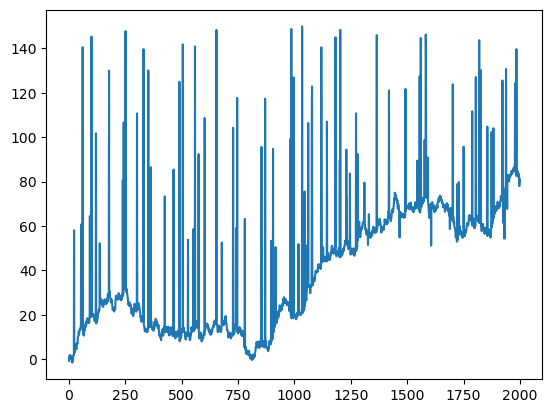

In [54]:
# create signal
n = 2000
# np.cumsum calculates the cumulative sum of elements along a given axis.
# signal array represents the cumulative sum of the random values
signal = np.cumsum(np.random.randn(n))

# proportion of time points to replace with noise
propnoise = .05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0:int(n*propnoise)]

# generate signal and replace points with noise
signal[noisepnts] = 50+np.random.rand(len(noisepnts))*100

fig3=plt.figure(3)
plt.plot(range(0,n),signal)

(array([456., 524.,  93., 318., 473.,  76.,  16.,  12.,  14.,  18.]),
 array([ -1.42945177,  13.70001819,  28.82948815,  43.9589581 ,
         59.08842806,  74.21789802,  89.34736798, 104.47683794,
        119.60630789, 134.73577785, 149.86524781]),
 <BarContainer object of 10 artists>)

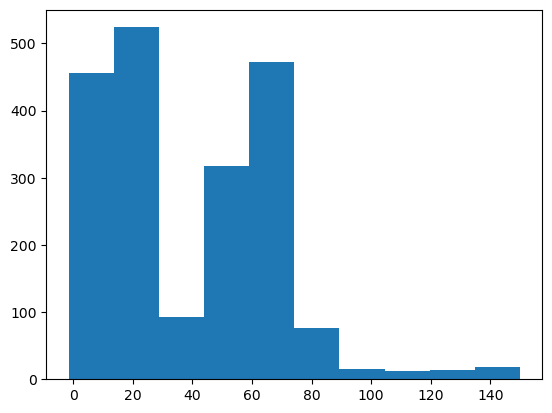

In [55]:
# use hist to pick threshold
plt.hist(signal)

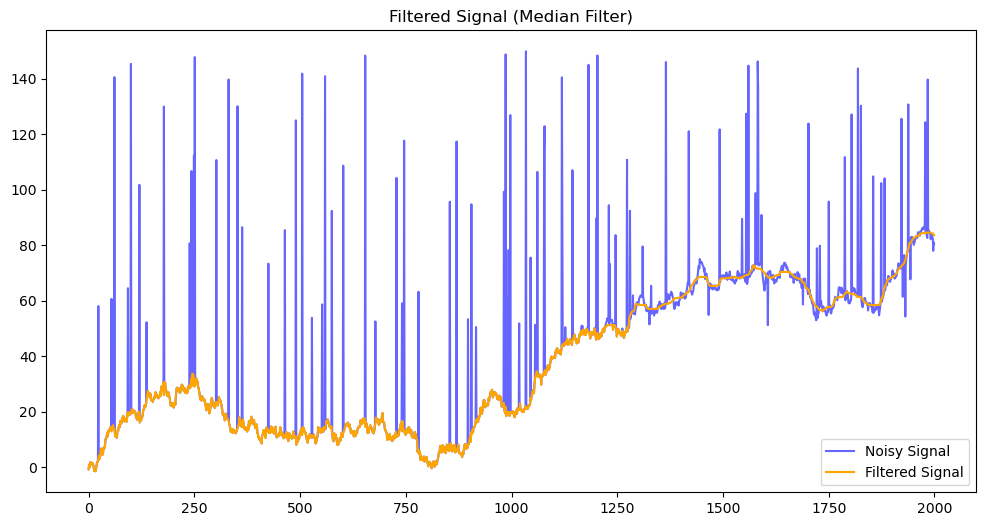

In [56]:
# visual-picked threshold
threshold = 50

# find data values above the threshold
suprathresh = np.where(signal > threshold)[0]

# initialize filtered signal
filtsig = copy.deepcopy(signal)

# loop through suprathreshold points and set to median of k
k = 20 # actual window is k*2+1
for ti in suprathresh:
    lower_bound = max(0, ti - k)
    upper_bound = min(n, ti + k + 1)
    filtsig[ti] = np.median(signal[lower_bound:upper_bound])

# TO DO: plot your results as directed
plt.figure(figsize=(12, 6))
plt.plot(range(0, n), signal, label="Noisy Signal", alpha=0.6, color = "blue")
plt.plot(range(0, n), filtsig, label="Filtered Signal", color="orange")
plt.title("Filtered Signal (Median Filter)")
plt.legend()
plt.show()

## Discussion

**Compare the mean and median filters in terms of their uses and one advantage and disadvantage one has over the other.**

Mean filter is good at dealing with lots of noise but without such extreme amplitudes. Median filter is better at dealing with outliers where there are less of them but they are larger spikes. So once you know what kind of noise is affecting the original signal, choosing mean vs median is an easy choice.

## 1.3 Denoising an EMG signal

512


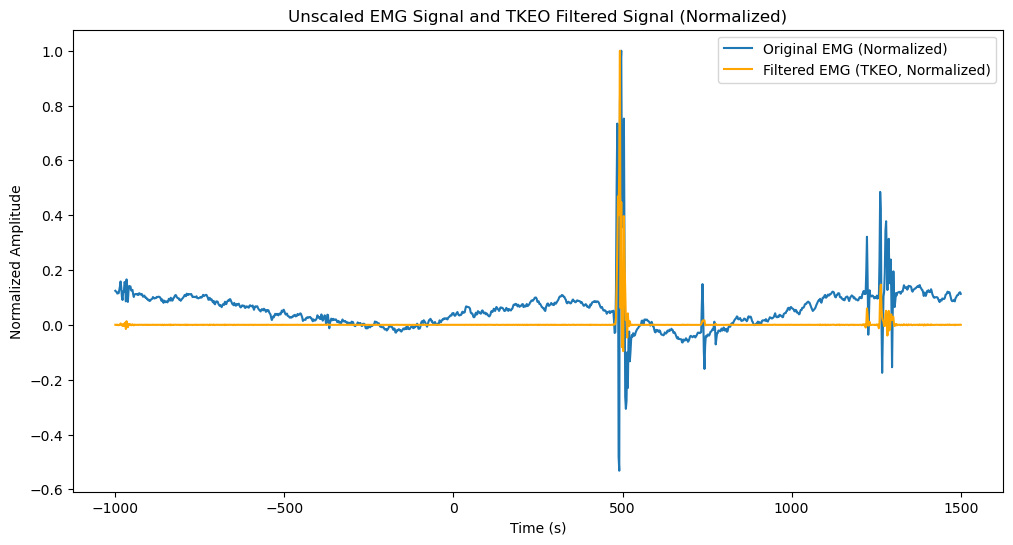

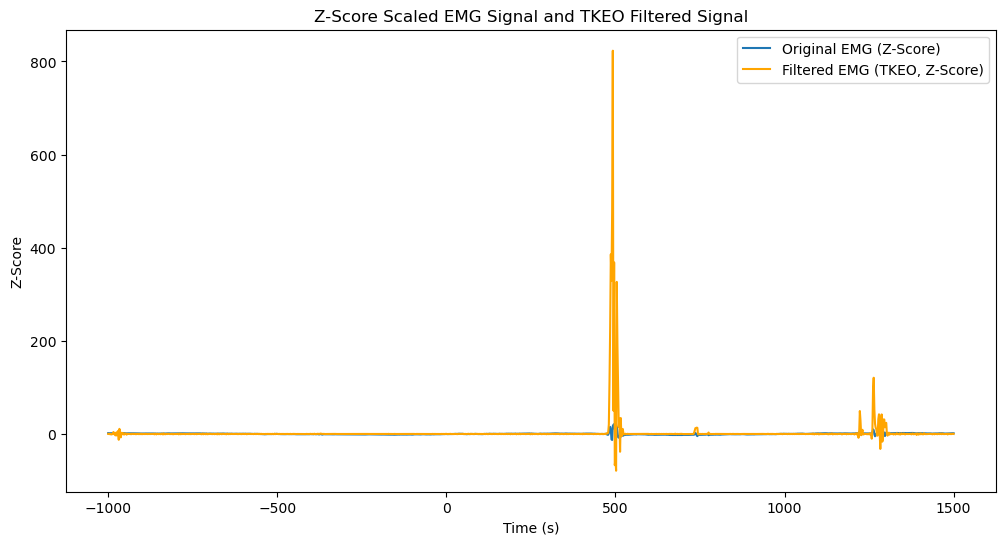

In [57]:
# import data
emgdata = scipy.io.loadmat('EMG-1.mat')

# extract needed variables
emgtime = emgdata['emgtime'][0]
emg  = emgdata['emg'][0]

# initialize filtered signal
emgf = copy.deepcopy(emg) # this is where the result of
# the TKEO algorithm should be stored

# apply the TKEO algorithm

for t in range(1, len(emg) - 1):
    emgf[t] = emg[t]**2 - emg[t + 1] * emg[t - 1]

## convert both signals to zscore

# find timepoint zero
time0 = np.argmin(np.abs(emgtime))
print(time0)

# convert original EMG to z-score from time-zero
emg_mean = np.mean(emg[:time0])
emg_std = np.std(emg[:time0])

emgZ = (emg - emg_mean) / emg_std

# same for filtered EMG energy
emgf_mean = np.mean(emgf[:time0])
emgf_std = np.std(emgf[:time0])

emgZf = (emgf - emgf_mean) / emgf_std

emg_normalized = emg / np.max(np.abs(emg))
emgf_normalized = emgf / np.max(np.abs(emgf))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(emgtime, emg_normalized, label="Original EMG (Normalized)")
plt.plot(emgtime, emgf_normalized, label="Filtered EMG (TKEO, Normalized)", color="orange")
plt.title("Unscaled EMG Signal and TKEO Filtered Signal (Normalized)")
plt.xlabel("Time (s)")
plt.ylabel("Normalized Amplitude")
plt.legend()
plt.show()

# Plot Z-score scaled results
plt.figure(figsize=(12, 6))
plt.plot(emgtime, emgZ, label="Original EMG (Z-Score)")
plt.plot(emgtime, emgZf, label="Filtered EMG (TKEO, Z-Score)", color="orange")
plt.title("Z-Score Scaled EMG Signal and TKEO Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Z-Score")
plt.legend()
plt.show()


## Discussion

**How would the other two filters implemented, i.e, the running mean and median filters fare against the TKEO method in analysing the EMG signal in this fashion?**

The running mean filter would fair very poorly in this application as the abrupt spikes which indicate muscle activity would just get smoothed out. Small spikes would get smoothed out completely while large spikes will be reduced in size. For the median filter, it does great at getting rid of outliers which isn't ideal for this application but it still maintains sharp transitions.

**If you had to use a running mean filter or a median filter to analyse the EMG signal to detect muscle activity, which one would you prefer and why?**

I would prefer using the median filter as it still preserves some sharp changes in the signal. For a signal like the one above, the running mean filter would completely flatten it out as it relies on neighboring values to filter.